In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline  
import emcee
import math
import matplotlib
from pylab import *
import matplotlib.patheffects as PathEffects
hfont = {'fontname':'Times New roman'}

mpl.rcParams['legend.numpoints'] = 1




In [24]:
###### CIV
x = np.array([pow(10.0, 12.6250), pow(10.0, 12.8750), 
              pow(10.0, 13.1250), pow(10.0, 13.3750), 
              pow(10.0, 13.6250), pow(10.0, 13.8750), 
              pow(10.0, 14.1250)])


xbound_low = np.array([pow(10.0, 12.6250-0.125), pow(10.0, 12.8750-0.125), 
              pow(10.0, 13.1250-0.125), pow(10.0, 13.3750-0.125), 
              pow(10.0, 13.6250-0.125), pow(10.0, 13.8750-0.125), 
              pow(10.0, 14.1250-0.125)])





xbound_high = np.array([pow(10.0, 12.6250+0.125), pow(10.0, 12.8750+0.125), 
              pow(10.0, 13.1250+0.125), pow(10.0, 13.3750+0.125), 
              pow(10.0, 13.6250+0.125), pow(10.0, 13.8750+0.125), 
              pow(10.0, 14.1250+0.125)])



y =np.array([1.05684080448e-13,
              7.59352943023e-14,
              4.11405947887e-14,
              3.13951840871e-14,
              5.44091807805e-15,
              2.50715746988e-15,
              8.07844432252e-16])

yerr = np.array([4.73116597054e-14,
                 3.00735874125e-14,
                 1.65996404047e-14,
                 1.08741398468e-14,
                 3.39468507095e-15,
                 1.72804163882e-15,
                 7.35575515922e-16])




In [28]:
###### SiIV
x1 = np.array([pow(10.0, 12.6250), pow(10.0, 12.8750), 
              pow(10.0, 13.1250), pow(10.0, 13.3750), 
              pow(10.0, 13.6250), pow(10.0, 13.8750)])

xbound_low1 = np.array([pow(10.0, 12.6250-0.125), pow(10.0, 12.8750-0.125), 
              pow(10.0, 13.1250-0.125), pow(10.0, 13.3750-0.125), 
              pow(10.0, 13.6250-0.125), pow(10.0, 13.8750-0.125)])

xbound_high1 = np.array([pow(10.0, 12.6250+0.125), pow(10.0, 12.8750+0.125), 
              pow(10.0, 13.1250+0.125), pow(10.0, 13.3750+0.125), 
              pow(10.0, 13.6250+0.125), pow(10.0, 13.8750+0.125)])



y1 = np.array([7.5842944505e-14 ,
               4.05990161101e-14,
               8.82641160633e-15,
               4.76062106102e-15,
               1.46807785938e-15])

yerr1 = np.array([4.34306258632e-14,
                  2.38284750392e-14,
                  8.33164166627e-15,
                  4.58849541289e-15,
                  1.43289061952e-15])



In [29]:
xfit = np.array([pow(10.0, 12.5), pow(10.0, 17.75)])
x1fit = np.array([pow(10.0, 12.5), pow(10.0, 17.0)])
N0 =  pow(10.0, 13.64)



alpha = -1.14
alpha_error = 0.15
logB = -14.342937
logb_error = 0.11
fit_values = pow(10.0, logB)*pow(xfit/N0, alpha)
fit_values_low = pow(10.0, logB - logb_error)*pow(xfit/N0, alpha-alpha_error)
fit_values_high = pow(10.0, logB + logb_error)*pow(xfit/N0, alpha+alpha_error)


alpha1 =-1.46  
alpha_error1 = 0.31
logB1 = -14.773188
logb_error1 = 0.25

fit_values1 = pow(10.0, logB1)*pow(x1fit/N0, alpha1)
fit_values_low1 = pow(10.0, logB1 - logb_error1)*pow(x1fit/N0, alpha1 -alpha_error1)
fit_values_high1 = pow(10.0, logB1 + logb_error1)*pow(x1fit/N0, alpha1 +alpha_error1)



In [30]:
x = [ 12.6250,
      12.8750,
      13.1250,
      13.3750,
      13.6250,
      13.8750,
      14.1250]

xbound_low = [ 12.6250 -  0.125,
               12.8750 -  0.125,
               13.1250 - 0.125,
               13.3750 - 0.125,
               13.6250 - 0.125,
               13.8750 - 0.125,
               14.1250 - 0.125]

xbound_high = [ 12.6250 + 0.125,
                12.8750 + 0.125,
                13.1250 + 0.125,
                13.3750 + 0.125,
                13.6250 + 0.125,
                13.8750 + 0.125,
                14.1250 + 0.125]



x1 = [12.6250,
      12.8750,
      13.1250,
      13.3750,
      13.8750]

xbound_low1= [12.6250 - 0.125,
              12.8750 - 0.125,
              13.1250 - 0.125,
              13.3750 - 0.125,
              13.8750 - 0.125]

xbound_high1= [12.6250 + 0.125,
               12.8750 + 0.125,
               13.1250 + 0.125,
               13.3750 + 0.125,
               13.8750 + 0.125]
xfit  = np.array([ 12.5, 17.75])
x1fit = np.array([ 12.5, 17.00])

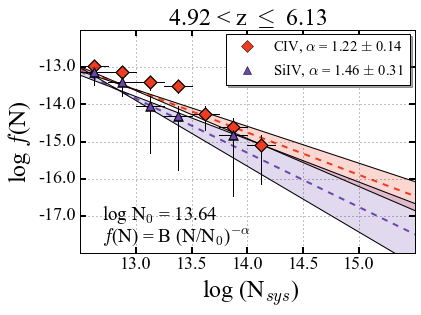

In [37]:
# x and y ranges and scale
plt.xlim([ 12.5, 15.5])
plt.ylim([pow(10.0, -18.0), pow(10, -12.0)] )
#plt.xscale('log')
plt.yscale('log')

# x and y ticks
xlabels = ['13.0', '13.5', '14.0', '14.5', '15.0']
plt.xticks([ 13.0, 13.5, 14.0, 14.5, 15.0], 
            xlabels, **hfont, fontsize = 18)
ylabels = ['-13.0', '-14.0', '-15.0', '-16.0', '-17.0']
plt.yticks([pow(10.0, -13.0), pow(10.0, -14.0), 
            pow(10.0, -15.0), pow(10.0, -16.0),
            pow(10.0, -17.0)], 
            ylabels, **hfont, fontsize = 18)




plt.grid(True)

# define the colors
fullzcolor = [240.0/256.0, 59.0/256.0, 32.0/256.0]
z1color = [107/256.0, 70/256.0, 177/256.0]
z2color = [252/256.0, 146/256.0, 114/256.0]

# plot the best fit filled area
plt.plot(xfit, fit_values, '--', lw=2.0, color = fullzcolor)
plt.plot(xfit, fit_values_low, 'k-', lw=1.0)
plt.plot(xfit, fit_values_high, 'k-', lw=1.0)
plt.fill_between(xfit, fit_values_high, fit_values_low, color = fullzcolor, alpha = 0.2)


plt.plot(x1fit, fit_values1, '--', lw=2.0, color = z1color)
plt.plot(x1fit, fit_values_low1, 'k-', lw=1.0)
plt.plot(x1fit, fit_values_high1, 'k-', lw=1.0)
plt.fill_between(x1fit, fit_values_high1, fit_values_low1, color = z1color, alpha = 0.2)


# plot the error_bars
for i in range(0, len(x)):
    plt.plot([x[i], x[i]], [y[i] - yerr[i], y[i] + yerr[i]], 'k-', lw=1.0)
for i in range(0, len(x1)):
    plt.plot([x1[i], x1[i]], [y1[i] - yerr1[i], y1[i] + yerr1[i]], 'k-', lw=1.0)


# plot the x boundaries
for i in range(0, len(x)):
    plt.plot([xbound_low[i], xbound_high[i]], [y[i], y[i]], 'k-', lw=1.0)

for i in range(0, len(x1)):
    plt.plot([xbound_low1[i], xbound_high1[i]], [y1[i], y1[i]], 'k-', lw=1.0)    
 
# x, y labels and title
plt.xlabel(' log (N$_{sys}$)', **hfont,  fontsize=24)
plt.ylabel('log $f$(N)', **hfont,  fontsize=24)
plt.title("4.92 < z $\leq$ 6.13", **hfont,  fontsize=24)


# plot the data
plt.plot(x, y, 'kD', markersize=10, alpha=1.0)  
plt.plot(x, y, 'D', markersize=8, alpha=1.0, color = fullzcolor,
         label= "CIV, $\\alpha$ = 1.22 $\pm$ 0.14")

plt.plot(x1, y1, 'k^', markersize=10, alpha=1.0)  
plt.plot(x1, y1, '^', markersize=8, alpha=1.0, color = z1color,
         label="SiIV, $\\alpha$ = 1.46 $\pm$ 0.31")



# add legend
plt.rc('legend',**{'fontsize':14.7})
plt.rc('font',family='Times New Roman')
plt.legend(bbox_to_anchor=(0.99, 0.99), loc=1, borderaxespad=0.1, shadow=True)

txt3 = plt.text(12.7,  pow(10, -17.7), 
                "$f$(N) = B (N/N$_{0}$)$^{-\\alpha}$", 
                **hfont,  fontsize=19, color = 'k')

txt4 = plt.text(12.7,  pow(10, -17.1), 
                "log N$_{0}$ = 13.64", 
                **hfont,  fontsize=19, color = 'k')

plt.tick_params(direction='in', length=6, width=2)

plt.tick_params(which='minor', length=0)


plot_path = '/Users/alex/Desktop/final_files/correct_precision/paper2/cddfs/plots/'
plot_name = plot_path + 'si4c4cddf.png'
plt.savefig(plot_name, bbox_inches='tight', figsize=[12,9], dpi=500)

